# Take home exam 01

In [1]:
# Libraries
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import scienceplots
import sympy as sp

# Plot style
plt.style.use(['science', 'nature', 'high-vis'])

#### 4a) Show, by iterating two close initial conditions, that this map is chaotic.
$$
x_{n+1} = f (x_n) = (2x_n − 1)^3,\text{ for } x_n \in [−1, 1].
$$

In [ ]:
# Function
def map_4(x0, iter):
    """
    Computes the evolution of a initial condition.

    Parameters
    ----------
    x0 : float
        Initial condition.
    iter : int
        Number of iterations.

    Returns
    -------
    x : list
        Evolution.
    """

    # Initialize
    x = [x0]

    # Iterate
    for i in range(iter + 1):
        
        # Compute
        next = (2 * x[i] - 1)**3

        # Append
        x.append(next)

    return x
        

In [3]:
# Initial conditions
x0_array = np.linspace(0.999_999_999, 1, 10)

In [4]:
# Evolution and initial conditions
evolutions = []
initial_conditions = []

# Counter 
counter = 0

# Iterate over initial conditions
for x0 in x0_array:

    try:
        # Compute the map
        x = map_4(x0, 13)

        # Counter
        counter += 1

        # No infinite or NaN values
        if np.any(np.isinf(x)) or np.any(np.isnan(x)):
            continue

        # Append
        evolutions.append(x)
        initial_conditions.append(x0)

    except:
        print(f"Error with x0 = {x0}")
        continue

In [5]:
# Pick a valid pair
two_evolutions = evolutions[-3:-1]
two_initial_conditions = initial_conditions[-3:-1]

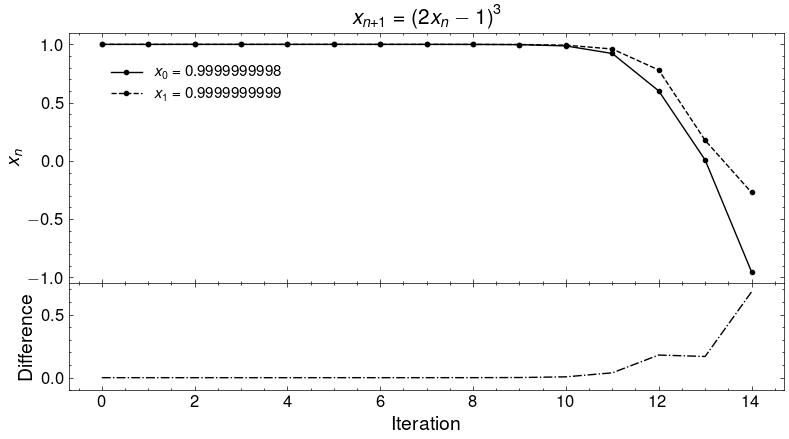

In [8]:
# Two panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4.5), sharex=True,
                               gridspec_kw={'hspace': 0, 'height_ratios': [7, 3]})

ax1.set_title(r"$x_{n+1}=\left(2x_n-1\right)^3$", fontsize=15)
ax1.set_ylabel(r"$x_n$", fontsize=14)

# Plots
ax1.plot(range(len(two_evolutions[0])), two_evolutions[0],
         label=r'$x_0=$' + f" {two_initial_conditions[0]:.10f}",
         marker='o', color='k')
ax1.plot(range(len(two_evolutions[1])), two_evolutions[1],
         label=r'$x_1=$' + f" {two_initial_conditions[1]:.10f}",
         marker='o', color='k', ls='--')

ax1.legend(loc=(0.05, 0.70), fontsize=11)
ax1.tick_params(axis='both', labelsize=12)

# Difference
difference = np.abs(np.array(two_evolutions[0]) - np.array(two_evolutions[1]))
ax2.plot(range(len(difference)), difference, color='k', ls = "-.")
ax2.set_xlabel("Iteration", fontsize=14)
ax2.set_ylabel("Difference", fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylim(-0.1, 0.75)

plt.tight_layout()
#plt.savefig("./plots/4a.pdf", bbox_inches='tight', dpi=200)
plt.subplots_adjust(hspace=0)
plt.show()

#### 5a) Bifurcation diagram of $x_n \in [-1,1]$ as a function of $r$.

$$
x_{n+1} = f(x_n) = \sin^2(r \arcsin(\sqrt{x_n})),\text{ for } r \in [1, 4].
$$

In [2]:
# Map
@jit(nopython=True)
def sine_map(x, r):
    return np.sin(r * np.arcsin(np.sqrt(x))) ** 2

In [112]:
def bifurcation(r_min=1.0, r_max=4.0, width=1000, height=1000, 
                transient=1000, numtoplot=100000, initial_x=0.25):
    
    # Create a 2D histogram
    hist = np.zeros((height, width), dtype = np.int32)
    
    # Calculate r values for each column
    r_values = np.linspace(r_min, r_max, width)
    
    print("---------------------------------------------------")
    print("Bifurcation diagram data...")
    print("---------------------------------------------------")

    # For each parameter value
    for i, r in enumerate(r_values):

        # Every 500 iterations
        if i % 500 == 0:
            print(f"Processing r = {r:.4f}, ({i}/{width})")
        
        # Initial condition
        x = initial_x
        
        # Run transient iterations
        for _ in range(transient):
            x = sine_map(x, r)
        
        # Record iterations after transient
        for _ in range(numtoplot):
            x = sine_map(x, r)
            
            # Map x to a row in the histogram
            if 0 <= x <= 1:  # Ensure x is in valid range
                row = int((1 - x) * (height - 1))
                hist[row, i] += 1

    # End
    print("---------------------------------------------------")
    print("Done!")
    print("---------------------------------------------------")
    
    return hist, r_values

In [224]:
# Call (it was saved)
hist, r_values = bifurcation(
    r_min = 1.0, 
    r_max = 4.0, 
    width = 7000,
    height= 7000//4,
    transient = 500,#
    numtoplot = 7000
)

---------------------------------------------------
Bifurcation diagram data...
---------------------------------------------------
Processing r = 1.0000, (0/7000)
Processing r = 1.2143, (500/7000)
Processing r = 1.4286, (1000/7000)
Processing r = 1.6429, (1500/7000)
Processing r = 1.8573, (2000/7000)
Processing r = 2.0716, (2500/7000)
Processing r = 2.2859, (3000/7000)
Processing r = 2.5002, (3500/7000)
Processing r = 2.7145, (4000/7000)
Processing r = 2.9288, (4500/7000)
Processing r = 3.1432, (5000/7000)
Processing r = 3.3575, (5500/7000)
Processing r = 3.5718, (6000/7000)
Processing r = 3.7861, (6500/7000)
---------------------------------------------------
Done!
---------------------------------------------------


In [225]:
# Save data
# np.savetxt("./data/sinemap_tran1000_toplot10000_w30000.txt", hist, delimiter=",")

# Read data
# hist = np.loadtxt("./data/sinemap_tran1000_toplot10000_w30000.txt", delimiter=",")

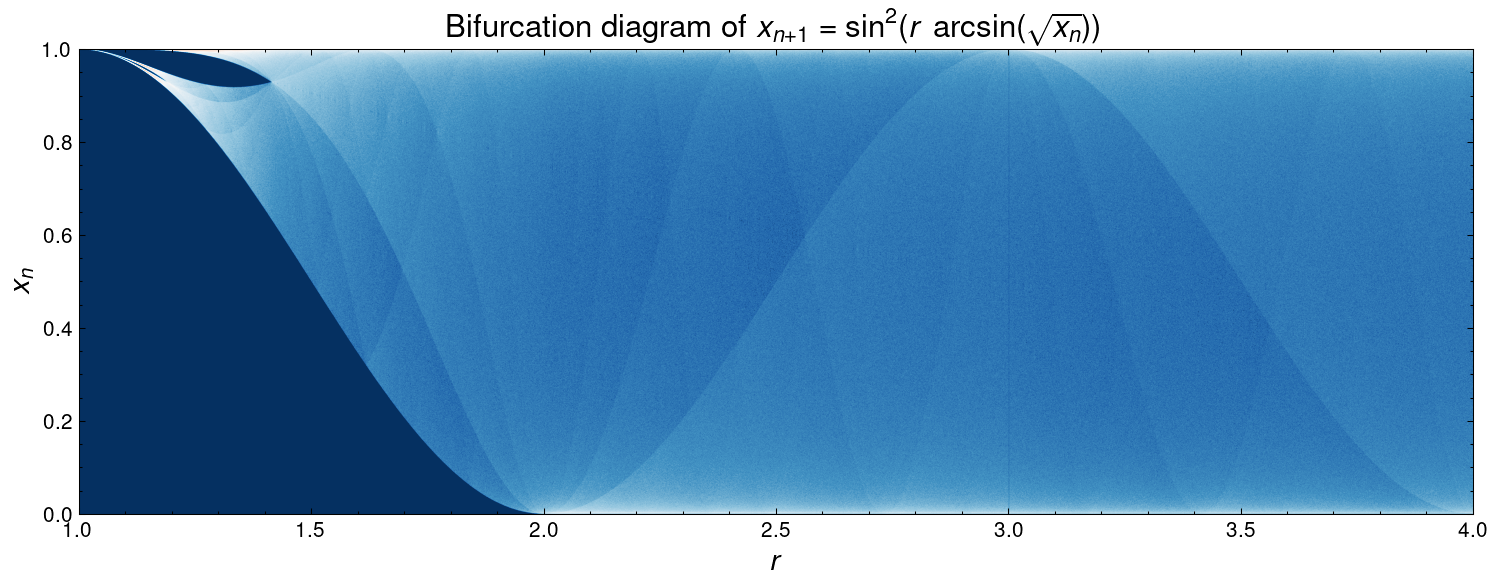

In [226]:
# Plot
plt.figure(figsize=(12, 4), dpi=150)

# Histogram
plt.imshow(np.log10(hist+1), cmap='RdBu_r', extent=[1.0, 4.0, 0.0, 1.0])

# Labels
plt.title("Bifurcation diagram of "+ r"$x_{n+1} = \sin^2(r\,\arcsin(\sqrt{x_n}))$", fontsize=15)
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$x_n$', fontsize=14)
plt.tick_params(axis='both', labelsize=10)

plt.tight_layout()
#plt.savefig("./plots/5a[1-4]-new.pdf", dpi=200, bbox_inches='tight')
plt.show()

#### 5b) Lyapunov exponent of the map in 5a.

In [3]:
# Analytical derivative
x, r = sp.symbols('x r')

# Function
map = sp.sin(r * sp.asin(sp.sqrt(x)))**2

# Derivative
map_prime = sp.diff(map, x)
map_prime = sp.simplify(map_prime)

# Print
map_prime

r*sin(2*r*asin(sqrt(x)))/(2*sqrt(x)*sqrt(1 - x))

In [118]:
@jit(nopython=True)
def derivative_map(x, r):

    eps = 1e-8
    
    return (r * np.sin(2 * r * np.arcsin(np.sqrt(x)))) / (2 * np.sqrt(x + eps) * np.sqrt(1-x+eps))

In [119]:
def lyapunov(r_min=1.0, r_max=4.0, partitions = 1000,
             transient=1000, nontransient=9000, initial_x=0.20):
    # Values for r
    r_values = np.linspace(r_min, r_max, partitions)

    # Initialize Lyapunov exponent
    log_list = np.zeros(nontransient)
    lyapunov_r = np.zeros(partitions)
    
    print("---------------------------------------------------")
    print("Calculating the Lyapunov exp...")
    print("---------------------------------------------------")

    # For each parameter value
    for i, r in enumerate(r_values):
        
        # Initial condition
        x = initial_x
        
        # Run transient iterations
        for _ in range(transient):
            x = sine_map(x, r)
        
        # Record iterations after transient
        for _ in range(nontransient):

            # Get the next value
            x = sine_map(x, r)

            # Compute the log of the derivative
            deriv = derivative_map(x, r)

            # Check
            log = np.log(abs(deriv + 0.0001))

            # Append to the list
            log_list[_] = log

        # Compute the Lyapunov exponent
        lyapunov_r[i] = np.mean(log_list)

    print("Done!")
    print("---------------------------------------------------")

    return lyapunov_r, r_values

In [142]:
# Call
lyapunov_r, r_values = lyapunov(
    r_min = 1.0, 
    r_max = 4.0, 
    partitions = 1000,
    transient = 5000,
    nontransient = 5000
)

---------------------------------------------------
Calculating the Lyapunov exp...
---------------------------------------------------
Done!
---------------------------------------------------


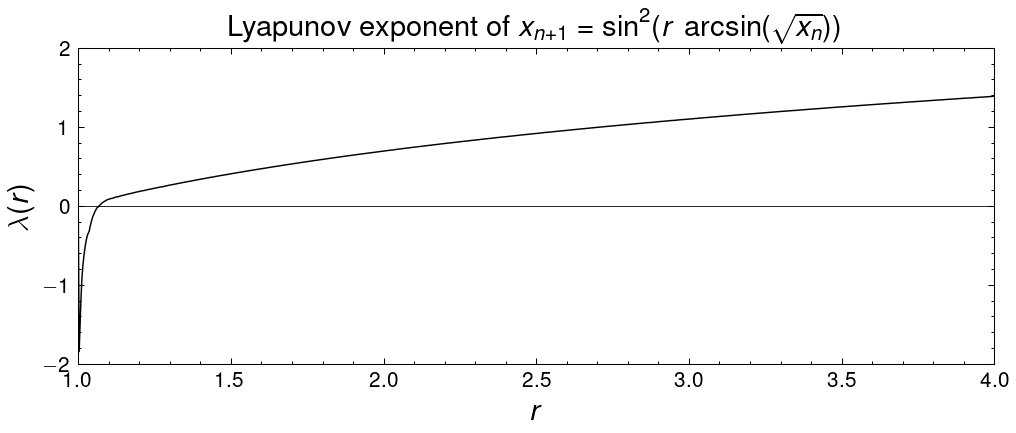

In [181]:
# plot
plt.figure(figsize=(7, 3), dpi=150)

plt.plot(r_values, lyapunov_r, color='k', lw=0.7)
plt.axhline(0, color='k', ls='-', lw=0.4)

plt.title("Lyapunov exponent of " + r"$x_{n+1} = \sin^2(r\,\arcsin(\sqrt{x_n}))$", fontsize=14)
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$\lambda(r)$', fontsize=14)

plt.tick_params(axis='both', labelsize=10)
plt.xlim(1.0, 4)
plt.ylim(-2, 2)

plt.tight_layout()
plt.savefig("./plots/5b[1-4].pdf", dpi=200, bbox_inches='tight')
plt.show()

#### $r = 3.00$ and $x_0 = 0.25$. THE MAP IS NOT CHAOTIC.

In [182]:
@jit(nopython=True)
def sine_map_3(x):
    return np.sin(int(3.0) * np.arcsin(np.sqrt(x))) ** 2

In [183]:
def time_series(x0=0.25, transient = 1000, nontrans = 5000):

    # Initial condition
    x_current = x0

    # Transient
    for _ in range(transient):
        x_current = sine_map_3(x_current)

    # Initialize
    x = np.zeros(nontrans)

    # Non transient
    for i in range(nontrans):
        x[i] = x_current
        x_current = sine_map_3(x_current)

    return x

In [184]:
# Call
x_25 = time_series(x0=0.25, transient=5000, nontrans=15)
x_251 = time_series(x0=0.249, transient=5000, nontrans=15)
x_5 = time_series(x0=1/8, transient=5000, nontrans=15)
#x_75 = time_series(x0=0.75, transient=5000, nontrans=15)
#x_999 = time_series(x0=0.999, transient=5000, nontrans=15)

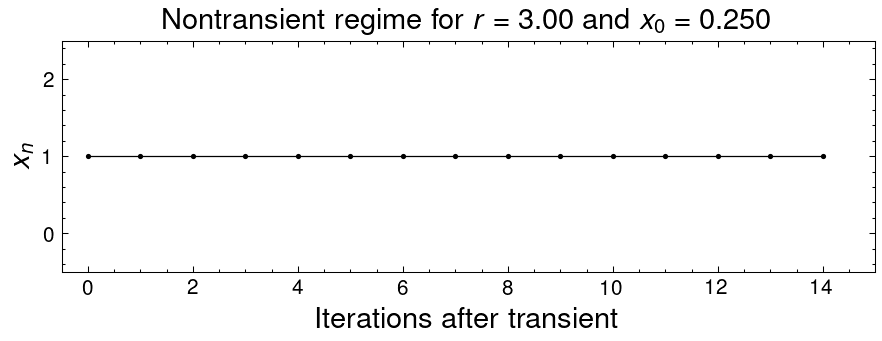

In [199]:
# Plot
plt.figure(figsize=(7, 2), dpi=150)
plt.plot(x_25, color='k', lw=0.6, marker='.')
#plt.plot(x_251, color='k', lw=0.6, label=r"$x_0=0.249$", marker='.')
plt.xlabel(r'Iterations after transient', fontsize=14)
plt.ylabel(r'$x_n$', fontsize=14)
plt.title(r"Nontransient regime for $r = 3.00$ and $x_0 = 0.250$", fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./plots/not-chaotic.pdf", dpi=200, bbox_inches='tight')
plt.xlim(-0.5, 15)
plt.ylim(-0.5, 2.5)
plt.show()

#### 6b) Plot the attractor for $a=0.6.$ Strange?


$$
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{z}
\end{bmatrix} = \begin{bmatrix}
y \\
z \\
-0.6z - y +|x|-1
\end{bmatrix}

In [81]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Define a 3D arrow for our axes indicator
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

In [82]:
# Libraries
from scipy.integrate import solve_ivp

In [83]:
# Define the slope
@jit(nopython=True)
def slope(t, S, a):

    # Get the state variables
    x, y, z = S

    # Define the equations
    dx_dt = y
    dy_dt = z
    dz_dt = -a * z - y + abs(x) - 1

    return [dx_dt, dy_dt, dz_dt]

In [236]:
# Parameters
a = 0.60
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 15000)
S0 = [0.1, 0.1, 0.1]

# Solve the system for each initial condition
sol = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(a,))

# Extract the solution
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

In [245]:
# Now with a = 0.68
a2 = 0.68
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 15000)
sol2 = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(a2,))

# Extract the solution
x2 = sol2.y[0]
y2 = sol2.y[1]
z2 = sol2.y[2]

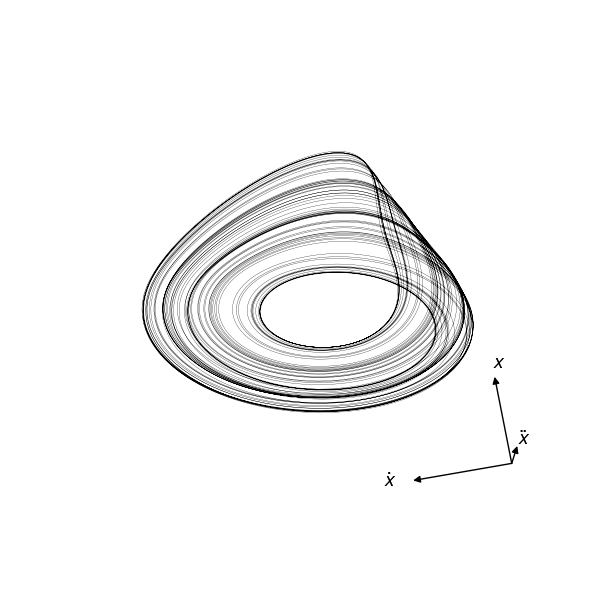

In [273]:
# Create the figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the Lorenz attractor
ax.plot(x[8000:], y[8000:], z[8000:], lw=0.2, color='k', alpha = 1)

# Get the limits for scaling the axes indicator
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
z_min, z_max = ax.get_zlim()

# Calculate scale for the axes indicator
scale = 0.25 * max(x_max - x_min, y_max - y_min, z_max - z_min)

# Position for the little axes
origin = [x_min, y_min, z_min]

# Better looking arrow properties
arrow_prop_dict = dict(
    mutation_scale=10,
    arrowstyle='-|>',
    linewidth=1.0,
    shrinkA=0,
    shrinkB=0,
    zorder=100 
)

# -------------- Little axes -----------------

# X-axis
a = Arrow3D([origin[0], origin[0] + scale], 
            [origin[1], origin[1]], 
            [origin[2], origin[2]], 
            color='k', **arrow_prop_dict)
ax.add_artist(a)

# Y-axis
b = Arrow3D([origin[0], origin[0]], 
            [origin[1], origin[1] + scale], 
            [origin[2], origin[2]], 
            color='k', **arrow_prop_dict)
ax.add_artist(b)

# Z-axis
c = Arrow3D([origin[0], origin[0]], 
            [origin[1], origin[1]], 
            [origin[2], origin[2] + scale], 
            color='k', **arrow_prop_dict)
ax.add_artist(c)

# Add axis labels with matching colors and better positioning
fontsize = 14

ax.text(origin[0] + scale*1.1, origin[1], origin[2], r"$x$", 
        color='k', fontsize=fontsize)
ax.text(origin[0], origin[1] + scale*1.3, origin[2], r"$\dot{x}$", 
        color='k', fontsize=fontsize)
ax.text(origin[0], origin[1], origin[2] + scale*1.1, r"$\ddot{x}$", 
        color='k', fontsize=fontsize)

# Add a small sphere at the origin point
# ax.scatter([origin[0]], [origin[1]], [origin[2]], 
#            color='black', s=1, alpha=0.7)

# View
ax.view_init(elev=75, azim=170, roll=0)

# 100, 250 -> faced-on
# 75, 170 -> like rossler

# Limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_axis_off()

plt.savefig("./plots/6b.png", dpi=800, bbox_inches='tight')

plt.tight_layout()
plt.show()

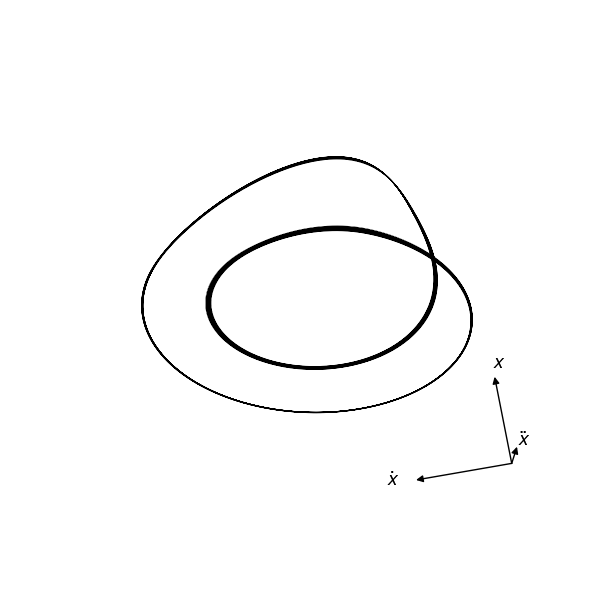

In [274]:
# Create the figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the Lorenz attractor
ax.plot(x2[1500:], y2[1500:], z2[1500:], lw=0.3, color='k')

# Get the limits for scaling the axes indicator
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
z_min, z_max = ax.get_zlim()

# Calculate scale for the axes indicator
scale = 0.25 * max(x_max - x_min, y_max - y_min, z_max - z_min)

# Position for the little axes
origin = [x_min, y_min, z_min]

# Better looking arrow properties
arrow_prop_dict = dict(
    mutation_scale=10,
    arrowstyle='-|>',
    linewidth=1.0,
    shrinkA=0,
    shrinkB=0,
    zorder=100 
)

# -------------- Little axes -----------------

# X-axis
a = Arrow3D([origin[0], origin[0] + scale], 
            [origin[1], origin[1]], 
            [origin[2], origin[2]], 
            color='k', **arrow_prop_dict)
ax.add_artist(a)

# Y-axis
b = Arrow3D([origin[0], origin[0]], 
            [origin[1], origin[1] + scale], 
            [origin[2], origin[2]], 
            color='k', **arrow_prop_dict)
ax.add_artist(b)

# Z-axis
c = Arrow3D([origin[0], origin[0]], 
            [origin[1], origin[1]], 
            [origin[2], origin[2] + scale], 
            color='k', **arrow_prop_dict)
ax.add_artist(c)

fontsize = 14

ax.text(origin[0] + scale*1.1, origin[1], origin[2], r"$x$", 
        color='k', fontsize=fontsize)
ax.text(origin[0], origin[1] + scale*1.3, origin[2], r"$\dot{x}$", 
        color='k', fontsize=fontsize)
ax.text(origin[0], origin[1], origin[2] + scale*1.1, r"$\ddot{x}$", 
        color='k', fontsize=fontsize)

# View
ax.view_init(elev=75, azim=170, roll=0)

# 100, 250 -> faced-on
# 75, 170 -> like rossler

# Limits
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_axis_off()

plt.savefig("./plots/6c.png", dpi=800, bbox_inches='tight')

plt.tight_layout()
plt.show()

#### Hopf bifurcation
Condition: 
$$
\lambda < \frac{2}{1-a^2}
$$

In [1]:
def slope(t, S, l, a):

    # Get the state variables
    x, y = S

    # Define the equations
    dx_dt = y
    dy_dt = -l * (x**2 - 1) * y - x + a

    return [dx_dt, dy_dt]

In [11]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [40]:
a = 10
2/(1-a**2)

-0.020202020202020204

In [109]:
# Parameters
l = -1.0
a = 2/(1-10**2)

t_span = (0, 12)
t_eval = np.linspace(t_span[0], t_span[1], 2000)
S0 = [-0.4, 0.5]
S1 = [-0.7, 0.6]
S2 = [0.2, -0.4]
S3 = [0.4, -0.6]

# Solve the system for each initial condition
sol = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(l, a,))
sol1 = solve_ivp(slope, t_span, S1, t_eval=t_eval, method='RK45', args=(l, a,))
sol2 = solve_ivp(slope, t_span, S2, t_eval=t_eval, method='RK45', args=(l, a,))
sol3 = solve_ivp(slope, t_span, S3, t_eval=t_eval, method='RK45', args=(l, a,))

# Extract the solution
x = sol.y[0]
y = sol.y[1]

x1 = sol1.y[0]
y1 = sol1.y[1]

x2 = sol2.y[0]
y2 = sol2.y[1]

x3 = sol3.y[0]
y3 = sol3.y[1]

In [126]:
# Other params
l = 1

t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 5000)
S0 = [1, 1]
S1 = [0.7, 0.8]
S2 = [0.2, 0.4]

# Solve the system for each initial condition
sol4 = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(l, a,))
sol5 = solve_ivp(slope, t_span, S1, t_eval=t_eval, method='RK45', args=(l, a,))
sol6 = solve_ivp(slope, t_span, S2, t_eval=t_eval, method='RK45', args=(l, a,))

# Extract the solution
x4 = sol4.y[0]
y4 = sol4.y[1]

x5 = sol5.y[0]
y5 = sol5.y[1]

x6 = sol6.y[0]
y6 = sol6.y[1]

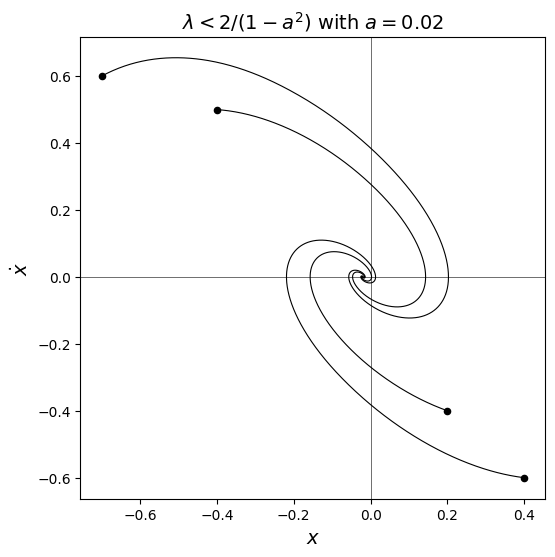

In [107]:
# PLot
plt.figure(figsize=(6, 6))
plt.plot(x, y, lw=.8, color='k', alpha = 1)
plt.plot(x1, y1, lw=.8, color='k', alpha = 1)
plt.plot(x2, y2, lw=.8, color='k', alpha = 1)
plt.plot(x3, y3, lw=.8, color='k', alpha = 1)
plt.axhline(0, color='k', ls='-', lw=0.4)
plt.axvline(0, color='k', ls='-', lw=0.4)
plt.title(r"$\lambda < 2/(1-a^2)$ with $a = 0.02$", fontsize=14)
plt.scatter(x[0], y[0], color='k', s=20)
plt.scatter(x1[0], y1[0], color='k', s=20)
plt.scatter(x2[0], y2[0], color='k', s=20)
plt.scatter(x3[0], y3[0], color='k', s=20)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$\dot{x}$", fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.show()

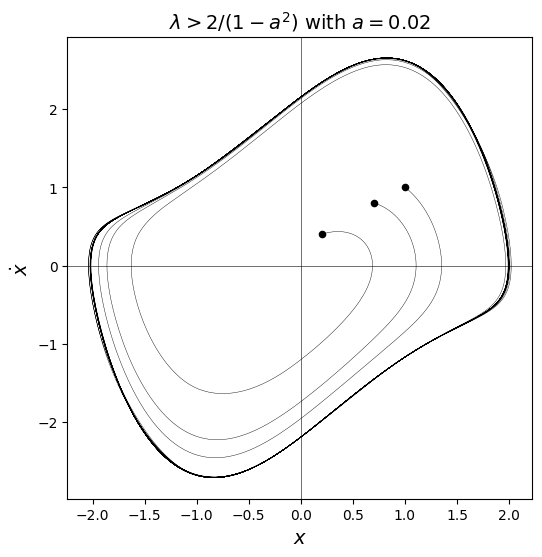

In [127]:
# PLot
plt.figure(figsize=(6, 6))
plt.plot(x4, y4, lw=0.3, color='k', alpha = 1)
plt.plot(x5, y5, lw=0.3, color='k', alpha = 1)
plt.plot(x6, y6, lw=0.3, color='k', alpha = 1)
plt.axhline(0, color='k', ls='-', lw=0.4)
plt.axvline(0, color='k', ls='-', lw=0.4)
plt.title(r"$\lambda > 2/(1-a^2)$ with $a = 0.02$", fontsize=14)
plt.scatter(x4[0], y4[0], color='k', s=20)
plt.scatter(x5[0], y5[0], color='k', s=20)
plt.scatter(x6[0], y6[0], color='k', s=20)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$\dot{x}$", fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.show()